#  Cats and Dogs



In [ ]:
#TODO
#1. Build a learning curve
#2. Test on the effects of epochs
#3. 

In [1]:
%matplotlib inline

In [2]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import vgg16; reload(vgg16)

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


<module 'vgg16' from 'vgg16.pyc'>

In [3]:
import utils; reload(utils)
from utils import plots

In [4]:
path = "../data/dogscats/"
#path = "../data/dogscats/sample/"

In [61]:
vg = vgg16.Vgg16()

In [62]:
batch_size = 90
epochs = 1

In [63]:
from keras.preprocessing import image
train = vg.get_batches(path+"/train", batch_size=batch_size)
valid = vg.get_batches(path+"/valid", batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


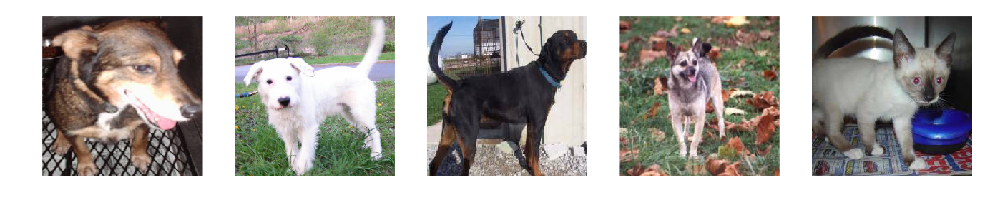

In [15]:
img, labs = next(train)
plots(img[5:10])

In [79]:
#Train on transformed images

train_transformed = vg.get_batches(path+"/train", batch_size=batch_size, gen=image.ImageDataGenerator(shear_range=0.05))

Found 23000 images belonging to 2 classes.


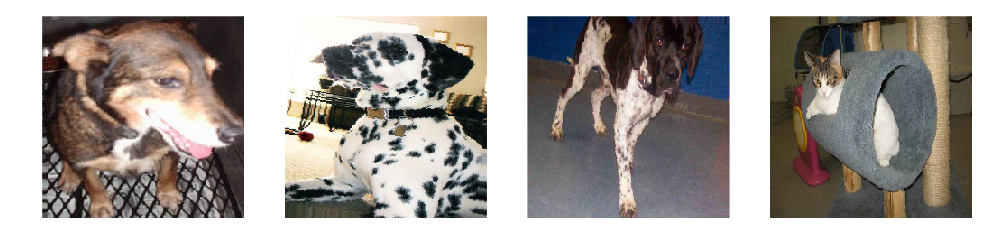

In [20]:
img, labs = next(train_transformed)
plots(img[0:4])

In [64]:
vg.finetune(train)
vg.fit(train, valid, epochs)

Epoch 1/1
23000/23000 [==============================] - 617s - loss: 0.1215 - acc: 0.9675 - val_loss: 0.0686 - val_acc: 0.9805


In [12]:
#save model
from keras.models import save_model, load_model
save_model(vg.get_model(), "../data/vgg_model_5epochs.hdf5")

AttributeError: Vgg16 instance has no attribute 'get_model'

In [ ]:
Question: when we train the model, the loss and accuracies shown during the process are for batch only or it's accumulative?'
    They are not the metrics measured on the whole train set!

In [80]:
vg.fit(train_transformed, valid, epochs)
#running

Epoch 1/1
23000/23000 [==============================] - 615s - loss: 0.1020 - acc: 0.9761 - val_loss: 0.0639 - val_acc: 0.9800


In [40]:
train_transformed2 = vg.get_batches(path+"/train", batch_size=batch_size, gen=image.ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2))
vg.fit(train_transformed2, valid, epochs)

Found 23000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 646s - loss: 0.0957 - acc: 0.9765 - val_loss: 0.0738 - val_acc: 0.9815


In [41]:
train_transformed3 = vg.get_batches(path+"/train", batch_size=batch_size, gen=image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True))
vg.fit(train_transformed3, valid, epochs)

Found 23000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 646s - loss: 0.3666 - acc: 0.9135 - val_loss: 0.0707 - val_acc: 0.9780


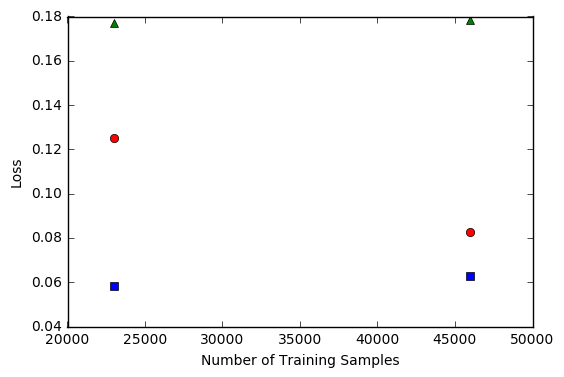

In [21]:
#Effects of adding transformed images into training

#batch_size = 90, I do fit sequentially after image transformation
image_set=['raw', 'rotation', 'shift', 'flip', 'shear']
train_loss_arr = [0.1215, 0.1058, 0.1023, 0.3786, 0.1020 ]
train_acc_arr = [0.9675, 0.9729, 0.9733, 0.9140, 0.9761]
valid_loss_arr = [0.0686, 0.0649,0.0632, 0.0760, 0.0639]
valid_acc_arr = [0.9805, 0.9775, 0.9805, 0.9820, 0.9800]
test_score = []


#--------------------------------
#batch_size =1, test score = 17.0, bad!
#batch_arr = [1, 64, 32, 16, 8, 50, 128, 90]
#train_loss_arr = [0.3177, 0.1269, 0.1287, 0.1511, 0.1883, 0.122, 0.1348, 0.1170]
#train_acc_arr = [0.9693, 0.9664, 0.9692, 0.9705, 0.9694, 0.9692, 0.9642, 0.9675]
#valid_loss_arr = [0.3344, 0.0902, 0.0771, 0.0868, 0.1481, 0.0636, 0.0726, 0.0606]
#valid_acc_arr = [0.9755, 0.9735, 0.9800, 0.9820, 0.9795, 0.9815, 0.979, 0.9815]

#batch_size = 90
#num_of_train_samples = [23000, 23000*2, 23000*3, 23000*4]
#train_loss_arr = [0.1298, 0.1045, 0.0957, 0.3666]
#train_acc_arr = [0.9659, 0.9730, 0.9765, 0.9135]
#valid_loss_arr = [0.0504, 0.0550, 0.0738, 0.0707]
#valid_acc_arr = [0.9855, 0.980, 0.9815, 0.978]
#--------------------------------
#batch_size = 64, the test score is much worse than before
#batch_number = [1, 2, 3, 4, 5]
#train_loss_arr = [0.1359, 0.1082, 0.1134, 0.1152, 0.1160]
#train_acc_arr = [0.9639, 0.9732, 0.9750, 0.9740, 0.9755]
#valid_loss_arr = [0.0624, 0.0605, 0.0809, 0.0640, 0.0633]
#valid_acc_arr = [0.9830, 0.9830, 0.9790, 0.9845, 0.9850]

test_score = [0.17722, 0.17860 ] #This can't be used to select batch size
plt.plot(num_of_train_samples, train_loss_arr, 'ro', num_of_train_samples, valid_loss_arr, 'bs', num_of_train_samples, test_score, 'g^')
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.show()

In [52]:
test_path = path+"/test"
print(test_path)

../data/dogscats//test


In [83]:
test = vg.get_batches(test_path, batch_size=batch_size)

Found 12500 images belonging to 1 classes.


2
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


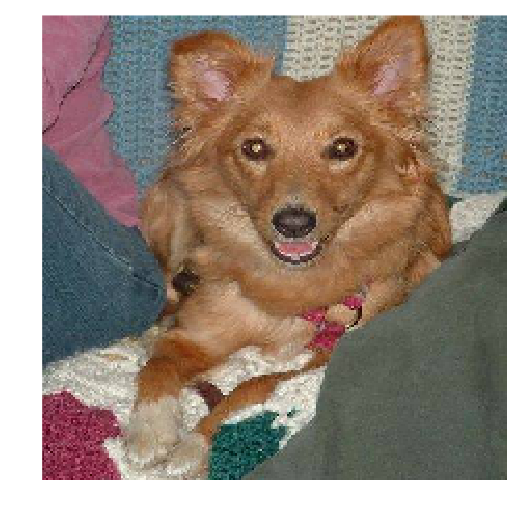

In [37]:
test_imgs = next(test)
print(len(test_imgs))
img1 = test_imgs[0]
plots(img1[0:1])
x2 = test_imgs[1]
print(x2[1:5])
#plots(img1[0:3])

In [31]:
res = vg.predict(img1)
print(res)

(array([ 1.    ,  0.9937,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.9999,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        0.9999,  1.    ,  1.    ,  1.    ,  1.    ,  0.9999,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ], dtype=float32), array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0]), ['cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'dogs', 'cats

In [84]:
#Predict on test images
import pandas as pd
fns = []
dog_probs = []
batch_nums = int(len(test.filenames)/batch_size+1)
start_fid = 0
print("Total number of files:%d"%len(test.filenames))
print("Total batches: %d"%batch_nums)
for batch_id in range(batch_nums):
    fids = range(start_fid, start_fid + batch_size)
    fids = [f for f in fids if f < len(test.filenames)]
    if len(fids) <= 0:
        break;
    test_imgs = next(test)
    batch_preds = vg.predict(test_imgs[0])
    batch_probs = batch_preds[0]
    batch_classes = batch_preds[1]
    if batch_id % 50 == 0:
        print("Current batch id = %d"%batch_id)
    if len(batch_probs) != batch_size:
        print("Batch id = %d, Batch size = %d"%(batch_id, len(batch_probs)))
    for ik in range(len(batch_probs)):
        #print("ik = %d, fid = %d"%(ik,fids[ik]))
        fn = test.filenames[fids[ik]]
        fn = fn.split("/")[1].split(".")[0] #Get file ID
        fns.append(fn)
        prob = batch_probs[ik]
        if batch_classes[ik] == 0: #cat
            prob = 1.0 - batch_probs[ik]
        #print(fn)
        dog_probs.append(prob)
    start_fid = start_fid + batch_size
    #print(start_fid)

#print("File names: %s"%fns)
#print("Dog probabilities: %s"%dog_probs)
df = pd.DataFrame({"id":fns, "label":dog_probs})
#print(df)
fn = "./neil_submission_batch" +str(batch_size) + "_epochs" + str(epochs) +"_shear.csv"
df.to_csv(fn, index=False)
print("Write to " + fn)
print("DONE!")
from IPython.display import FileLink
FileLink(fn)

Total number of files:12500
Total batches: 139
Current batch id = 0
Current batch id = 50
Current batch id = 100
Batch id = 138, Batch size = 80
Write to ./neil_submission_batch90_epochs1_shear.csv
DONE!


/home/ubuntu/nbs/ml/neil_submission_batch90_epochs1_shear.csv

# Below are some utility codes

(3, 224, 224)


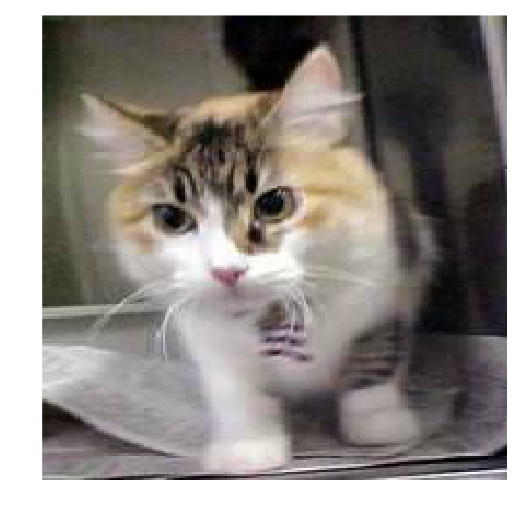

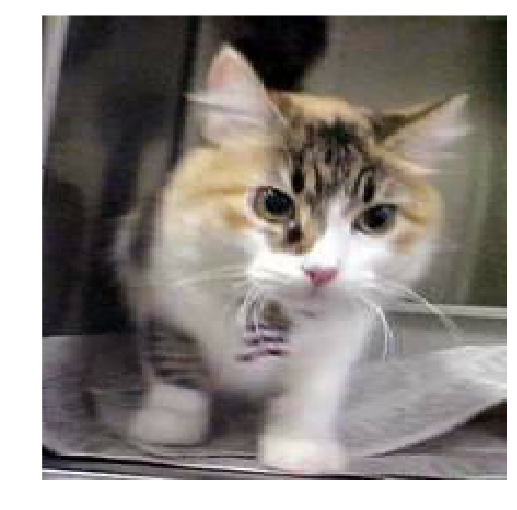

In [12]:
#My own version to inverst an image. Keras has implemented the smae thing
def invert_img(img):
    depths, nrows, ncols = img.shape
    #print(type(img1), nrows, ncols)
    img_r = np.ndarray([depths, nrows, ncols])
    for m in range(depths):
        for i in range(nrows):
            for j in range(ncols):
                img_r[m][i][j] = img[m][i][ncols-1-j]
                
    #plots([img_r])
    return img_r

img1 = img[0]
print(img1.shape)
img1_r = invert_img(img1) #No Need to define your own function to flip the images, keras has the library doing this
#print(img1_r)
#plots([img1])
#plots([img1_r])
#plots([img1], titles=labs)


    


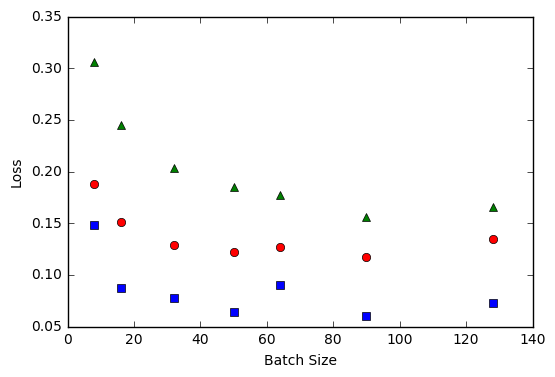

In [13]:
#Effects of batch size, I picked 90 as an optimized sample size according to train/valid data
#batch_size = 200 got out of memory error
batch_arr = [64, 32, 16, 8, 50, 128, 90]
train_loss_arr = [0.1269, 0.1287, 0.1511, 0.1883, 0.122, 0.1348, 0.1170]
train_acc_arr = [0.9664, 0.9692, 0.9705, 0.9694, 0.9692, 0.9642, 0.9675]
valid_loss_arr = [0.0902, 0.0771, 0.0868, 0.1481, 0.0636, 0.0726, 0.0606]
valid_acc_arr = [0.9735, 0.9800, 0.9820, 0.9795, 0.9815, 0.979, 0.9815]
test_score = [0.17722, 0.20386,0.24529, 0.30568, 0.18521, 0.16582, 0.15558] #This can't be used to select batch size
plt.plot(batch_arr, train_loss_arr, 'ro', batch_arr, valid_loss_arr, 'bs', batch_arr, test_score, 'g^')
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.show()


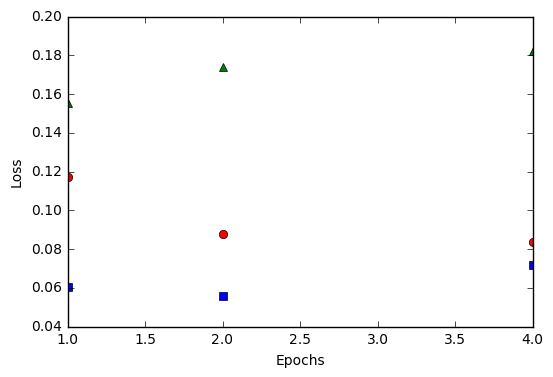

In [22]:
#Effects of epoches, batch_size is fixed at 90
# Looks like epoch=1 is best for me. I didn't do randomization of picture
#Why do people run multiple epoches? 
epoch_arr = [1.0, 2.0, 4.0]
train_loss_arr = [0.1170, 0.0876, 0.0837]
train_acc_arr = [0.9675,0.9792, 0.9798]
valid_loss_arr = [0.0606, 0.0557, 0.0717]
valid_acc_arr = [0.9815, 0.9815, 0.9805]
test_score = [0.15558, 0.17402, 0.18207] #This can't be used to select batch size
plt.plot(epoch_arr, train_loss_arr, 'ro', epoch_arr, valid_loss_arr, 'bs', epoch_arr, test_score, 'g^')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()